<a href="https://www.kaggle.com/code/indrajitpanda123/cineplex?scriptVersionId=146180719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cineplex-metadata-new/Case_data.xlsx


In [2]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.6 MB/s eta 0:00:00


In [3]:
df= pd.read_excel('/kaggle/input/cineplex-metadata-new/Case_data.xlsx')
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944


In [4]:
#exploratory data analysis

In [5]:
df.count() # checking the count

Product_ID      2301
Title_Name      2301
Release_Date    2301
Runtime         2301
Language        2301
Type            2301
IMAX            2301
Genres          2254
Admits          2301
dtype: int64

In [6]:
import pandas as pd

def analyze_dataframe(df):
    
    analysis = {}
    analysis['data_types'] = df.dtypes
    analysis['data_count'] = df.count()
    numeric_columns = df.select_dtypes(include=['number'])
    analysis['min_values'] = numeric_columns.min()
    analysis['max_values'] = numeric_columns.max()
    analysis['null_count'] = df.isnull().sum()

    return pd.DataFrame(analysis)


In [7]:
result = analyze_dataframe(df)
print(result)

             data_types  data_count  min_values  max_values  null_count
Admits            int64        2301         2.0   9174708.0           0
Genres           object        2254         NaN         NaN          47
IMAX              int64        2301         0.0         1.0           0
Language         object        2301         NaN         NaN           0
Product_ID        int64        2301    116000.0    149479.0           0
Release_Date     object        2301         NaN         NaN           0
Runtime           int64        2301         8.0      1087.0           0
Title_Name       object        2301         NaN         NaN           0
Type             object        2301         NaN         NaN           0


In [8]:
# remove null values from genre
df = df.dropna(subset=['Genres'])

In [9]:
result_new = analyze_dataframe(df)
print(result_new)

             data_types  data_count  min_values  max_values  null_count
Admits            int64        2254         2.0   9174708.0           0
Genres           object        2254         NaN         NaN           0
IMAX              int64        2254         0.0         1.0           0
Language         object        2254         NaN         NaN           0
Product_ID        int64        2254    116000.0    149479.0           0
Release_Date     object        2254         NaN         NaN           0
Runtime           int64        2254         8.0      1087.0           0
Title_Name       object        2254         NaN         NaN           0
Type             object        2254         NaN         NaN           0


In [10]:
# to clean the date of 9999 to 1999
df['Release_Date_new'] = df['Release_Date'].apply(lambda x: x.replace(year=1999) if x.year == 9999 else x)

In [11]:
result_new = analyze_dataframe(df)
print(result_new)

                      data_types  data_count  min_values  max_values  \
Admits                     int64        2254         2.0   9174708.0   
Genres                    object        2254         NaN         NaN   
IMAX                       int64        2254         0.0         1.0   
Language                  object        2254         NaN         NaN   
Product_ID                 int64        2254    116000.0    149479.0   
Release_Date              object        2254         NaN         NaN   
Release_Date_new  datetime64[ns]        2254         NaN         NaN   
Runtime                    int64        2254         8.0      1087.0   
Title_Name                object        2254         NaN         NaN   
Type                      object        2254         NaN         NaN   

                  null_count  
Admits                     0  
Genres                     0  
IMAX                       0  
Language                   0  
Product_ID                 0  
Release_Date         

In [12]:
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12


In [13]:
# create a variable to identify the weekday from the release date
df['weekday'] = df['Release_Date_new'].dt.strftime('%A')
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,weekday
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,Monday
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,Friday
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,Tuesday
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,Saturday
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,Friday


In [14]:
# Dealing with Genre column

genres = df['Genres'].str.get_dummies(' | ')
print(genres)

      Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          0          0          0          0       1      0            0   
1          0          0          0          0       1      0            0   
2          0          0          0          0       0      0            0   
3          0          1          0          0       0      0            0   
4          1          1          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
2295       0          1          0          0       0      0            0   
2296       0          1          0          0       0      0            0   
2297       0          1          0          0       0      0            0   
2298       0          1          0          0       0      0            0   
2300       0          0          0          0       1      0            0   

      Drama  Family  Fantasy  ...  Reality-TV  Romance  Sci-Fi  Short  Spor

In [15]:
df = pd.concat([df, genres], axis=1)
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,|
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,...,0,1,0,0,0,0,0,0,0,0
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,...,0,0,0,0,0,0,0,0,0,0
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,...,0,0,0,0,0,0,0,0,0,0
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,...,0,0,0,0,0,0,0,0,0,0
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(df.columns)

Index(['Product_ID', 'Title_Name', 'Release_Date', 'Runtime', 'Language',
       'Type', 'IMAX', 'Genres', 'Admits', 'Release_Date_new', 'weekday',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western', '|'],
      dtype='object')


In [17]:
df = df.drop(['|'], axis=1)


In [18]:
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,...,0,0,1,0,0,0,0,0,0,0
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,...,0,0,0,0,0,0,0,0,0,0
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,...,0,0,0,0,0,0,0,0,0,0
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,...,0,0,0,0,0,0,0,0,0,0
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# dealing with langauge data
value_counts = df['Language'].value_counts()
print(value_counts)

Language
English           1206
French             634
Hindi               91
Mandarin            69
Punjabi             57
Korean              37
Filipino            28
Japanese            22
Russian             21
Cantonese           12
Urdu                10
Spanish              8
Bengali              8
Hebrew               7
German               5
Norwegian            5
Persian              4
Italian              4
Tamil                4
Danish               3
Swedish              3
Vietnamese           2
Turkish              2
Malayalam            2
Hungarian            1
Swahili              1
Arabic               1
Yiddish              1
Romanian             1
Indonesian           1
Chinese              1
Default              1
Nauvhal              1
Serbo-Croatian       1
Name: count, dtype: int64


In [20]:
percentage_counts = (value_counts / len(df)) * 100
result_df_langauage = pd.DataFrame({
    'Language': value_counts.index,
    'Absolute Count': value_counts.values,
    'Percentage': percentage_counts.values
})
print(result_df_langauage)

          Language  Absolute Count  Percentage
0          English            1206   53.504880
1           French             634   28.127773
2            Hindi              91    4.037267
3         Mandarin              69    3.061224
4          Punjabi              57    2.528838
5           Korean              37    1.641526
6         Filipino              28    1.242236
7         Japanese              22    0.976043
8          Russian              21    0.931677
9        Cantonese              12    0.532387
10            Urdu              10    0.443656
11         Spanish               8    0.354925
12         Bengali               8    0.354925
13          Hebrew               7    0.310559
14          German               5    0.221828
15       Norwegian               5    0.221828
16         Persian               4    0.177462
17         Italian               4    0.177462
18           Tamil               4    0.177462
19          Danish               3    0.133097
20         Sw

In [21]:
# replacing all the other langauage as others apart from english and french
def categorize_language(language):
    if language in ['English', 'French']:
        return language
    else:
        return 'Others_language'
df['Language_Bucket'] = df['Language'].apply(categorize_language)
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Language_Bucket
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,...,0,1,0,0,0,0,0,0,0,English
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,...,0,0,0,0,0,0,0,0,0,English
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,...,0,0,0,0,0,0,0,0,0,English
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,...,0,0,0,0,0,0,0,0,0,English
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,...,0,0,0,0,0,0,0,0,0,English


In [22]:
#building bar
percentage_counts = (df['Language_Bucket'].value_counts() / len(df)) * 100

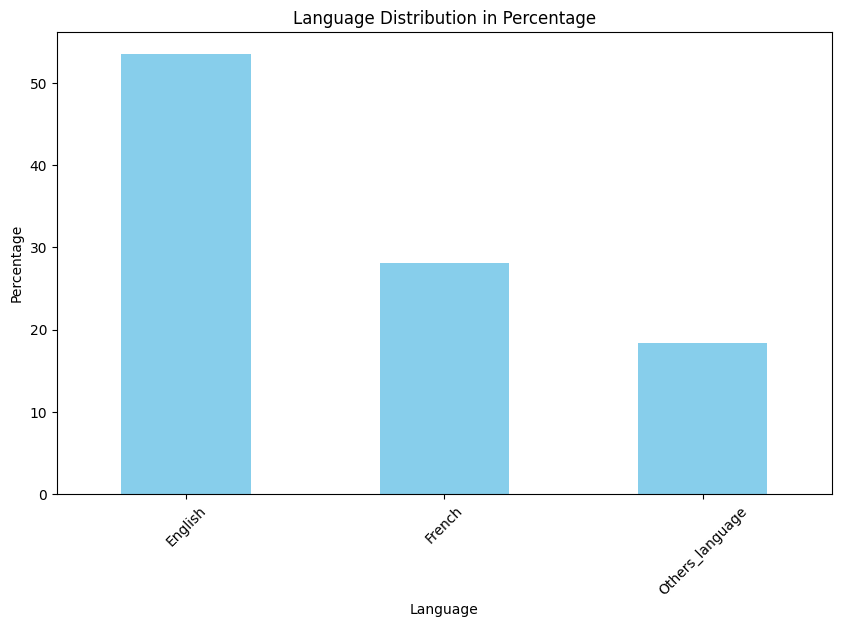

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
percentage_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution in Percentage')
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


In [24]:
# dealing with type
value_counts = df['Type'].value_counts()
print(value_counts)

Type
Film Presentation       1557
Alt Prog Film Event      447
Documentary               82
Stage Performance         63
Rec Room Event            44
Concert                   15
Speaking Engagement       10
FRCE Feature Release       8
Gaming Broadcast           7
Television Event           6
Sporting Event             6
Gaming Tournament          5
Opera                      4
Name: count, dtype: int64


In [25]:
percentage_counts = (value_counts / len(df)) * 100
result_df_langauage = pd.DataFrame({
    'Type': value_counts.index,
    'Absolute Count': value_counts.values,
    'Percentage': percentage_counts.values
})
print(result_df_langauage)

                    Type  Absolute Count  Percentage
0      Film Presentation            1557   69.077196
1    Alt Prog Film Event             447   19.831411
2            Documentary              82    3.637977
3      Stage Performance              63    2.795031
4         Rec Room Event              44    1.952085
5                Concert              15    0.665484
6    Speaking Engagement              10    0.443656
7   FRCE Feature Release               8    0.354925
8       Gaming Broadcast               7    0.310559
9       Television Event               6    0.266193
10        Sporting Event               6    0.266193
11     Gaming Tournament               5    0.221828
12                 Opera               4    0.177462


In [26]:
# replacing all the Type as others apart from Film Presentation and french
def categorize_type(type):
    if type in ['Film Presentation', 'Alt Prog Film Event']:
        return type
    else:
        return 'Others_type'
df['Type_Bucket'] = df['Type'].apply(categorize_type)
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Language_Bucket,Type_Bucket
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,...,1,0,0,0,0,0,0,0,English,Alt Prog Film Event
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,...,0,0,0,0,0,0,0,0,English,Film Presentation
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,...,0,0,0,0,0,0,0,0,English,Alt Prog Film Event
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,...,0,0,0,0,0,0,0,0,English,Alt Prog Film Event
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,...,0,0,0,0,0,0,0,0,English,Film Presentation


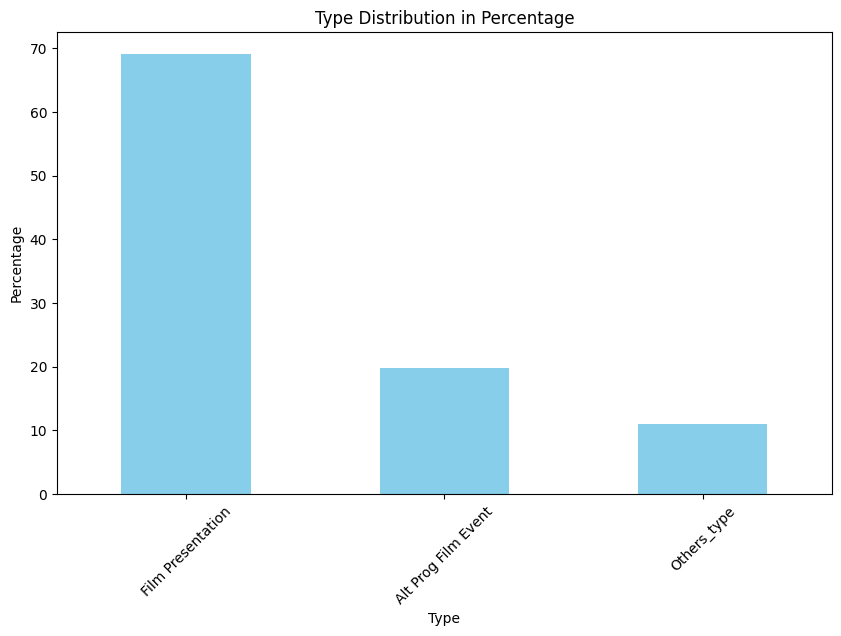

In [27]:
percentage_counts = (df['Type_Bucket'].value_counts() / len(df)) * 100
plt.figure(figsize=(10, 6))
percentage_counts.plot(kind='bar', color='skyblue')
plt.title('Type Distribution in Percentage')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [28]:
# one hot encoding of langauage_bucket
df_encoded = pd.get_dummies(df, columns=['Language_Bucket'], prefix='Language')
df_encoded.head()


,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,...,Short,Sport,Talk-Show,Thriller,War,Western,Type_Bucket,Language_English,Language_French,Language_Others_language
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,...,0,0,0,0,0,0,Alt Prog Film Event,True,False,False
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,...,0,0,0,0,0,0,Film Presentation,True,False,False
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,...,0,0,0,0,0,0,Alt Prog Film Event,True,False,False
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,...,0,0,0,0,0,0,Alt Prog Film Event,True,False,False
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,...,0,0,0,0,0,0,Film Presentation,True,False,False


In [29]:
# one hot encoding of langauage_bucket
df_encoded = pd.get_dummies(df_encoded, columns=['Type_Bucket'], prefix='Type')
df_encoded.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,...,Talk-Show,Thriller,War,Western,Language_English,Language_French,Language_Others_language,Type_Alt Prog Film Event,Type_Film Presentation,Type_Others_type
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,...,0,0,0,0,True,False,False,True,False,False
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,...,0,0,0,0,True,False,False,False,True,False
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,...,0,0,0,0,True,False,False,True,False,False
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,...,0,0,0,0,True,False,False,True,False,False
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,...,0,0,0,0,True,False,False,False,True,False


In [30]:
result = analyze_dataframe(df_encoded)
print(result)

                              data_types  data_count  min_values  max_values  \
Action                             int64        2254         0.0         1.0   
Admits                             int64        2254         2.0   9174708.0   
Adventure                          int64        2254         0.0         1.0   
Animation                          int64        2254         0.0         1.0   
Biography                          int64        2254         0.0         1.0   
Comedy                             int64        2254         0.0         1.0   
Crime                              int64        2254         0.0         1.0   
Documentary                        int64        2254         0.0         1.0   
Drama                              int64        2254         0.0         1.0   
Family                             int64        2254         0.0         1.0   
Fantasy                            int64        2254         0.0         1.0   
Game-Show                          int64

In [31]:
df=df_encoded

In [32]:
# creating normal distribution curve and QQ plot for the column runtime
mean = df['Runtime'].mean()
std_dev = df['Runtime'].std()

In [33]:
import seaborn as sns
from scipy import stats

In [34]:
params = stats.norm.fit(df['Runtime'])
x = np.linspace(df['Runtime'].min(), df['Runtime'].max(), 100)
fitted_pdf = stats.norm.pdf(x, loc=params[0], scale=params[1])

Text(0.5, 1.0, 'QQ Plot')

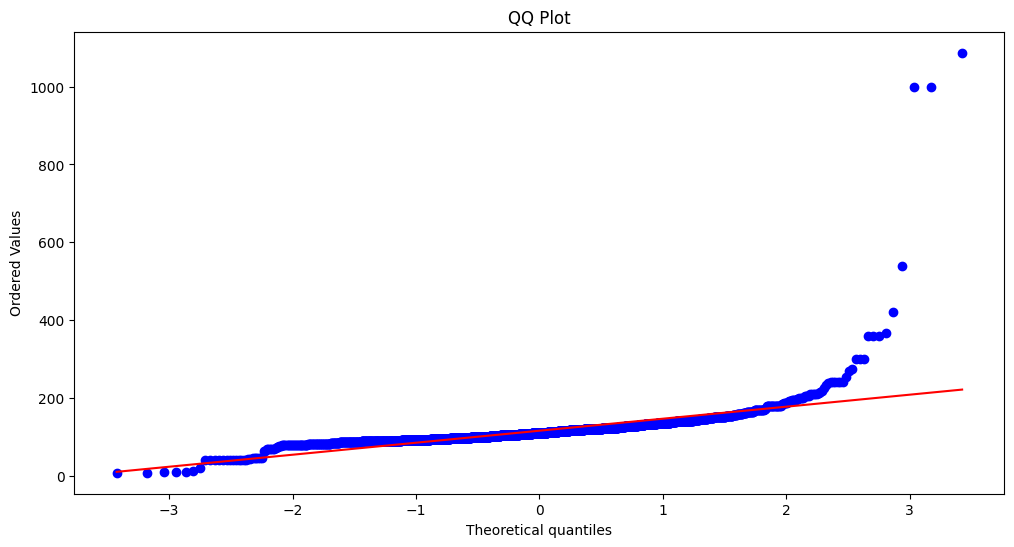

In [35]:
plt.figure(figsize=(12, 6))
stats.probplot(df['Runtime'], dist='norm', plot=plt)
plt.title('QQ Plot')

Text(0.5, 1.0, 'Histogram with Normal Distribution Curve')

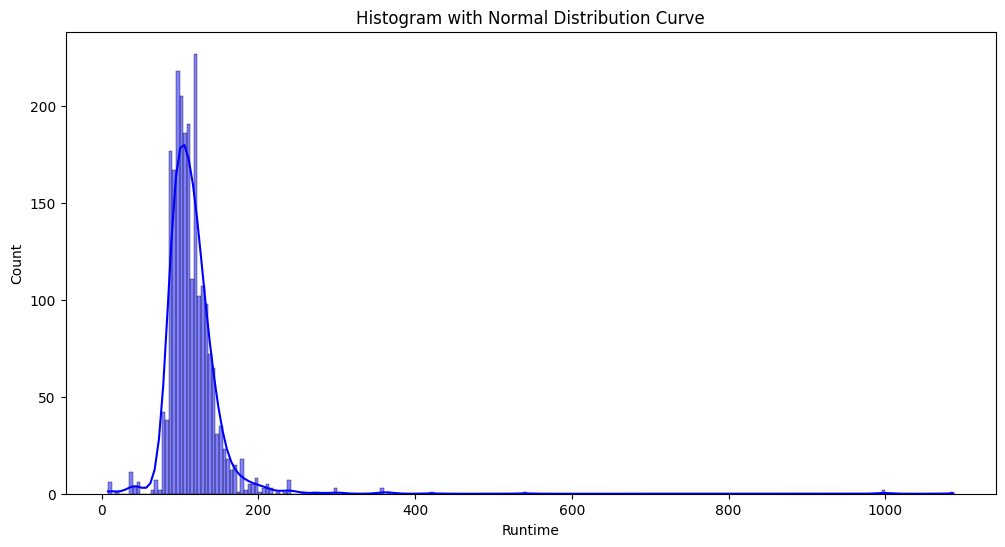

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Runtime'], kde=True, color='blue')
plt.title('Histogram with Normal Distribution Curve')

Text(0.5, 1.0, 'Histogram with Normal Distribution Curve')

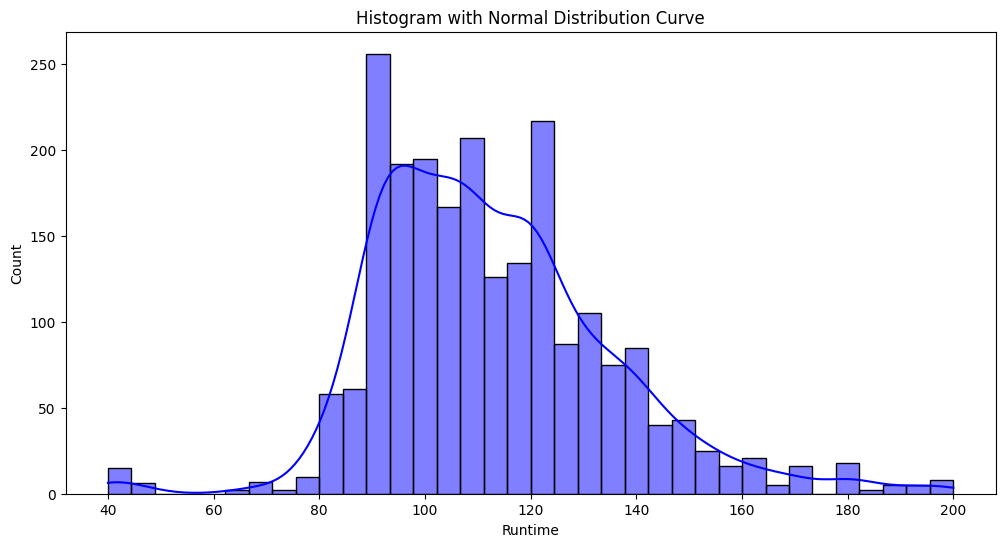

In [37]:
#To remove the outlier in the runtime column based on the normal distribution of the curve
#droping rows with runtime greater than 200
df1=df
df = df[df['Runtime'] <= 200]
df = df[df['Runtime'] >= 30]
plt.figure(figsize=(12, 6))
sns.histplot(df['Runtime'], kde=True, color='blue')
plt.title('Histogram with Normal Distribution Curve')


In [38]:
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,...,Talk-Show,Thriller,War,Western,Language_English,Language_French,Language_Others_language,Type_Alt Prog Film Event,Type_Film Presentation,Type_Others_type
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,...,0,0,0,0,True,False,False,True,False,False
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,...,0,0,0,0,True,False,False,False,True,False
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,...,0,0,0,0,True,False,False,True,False,False
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,...,0,0,0,0,True,False,False,True,False,False
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,...,0,0,0,0,True,False,False,False,True,False


In [39]:
# dealing with release date
df['Year'] = pd.to_datetime(df['Release_Date_new']).dt.year

df['Day'] = pd.to_datetime(df['Release_Date_new']).dt.day
df['WeekDay'] = pd.to_datetime(df['Release_Date_new']).dt.dayofweek
df['Weekend'] = df.WeekDay.isin([5, 6]).astype(int)
df.head()

,Product_ID,Title_Name,Release_Date,Runtime,Language,Type,IMAX,Genres,Admits,Release_Date_new,...,Language_English,Language_French,Language_Others_language,Type_Alt Prog Film Event,Type_Film Presentation,Type_Others_type,Year,Day,WeekDay,Weekend
0,118429,Clueless,2017-09-11 00:00:00,97,English,Alt Prog Film Event,0,Comedy | Romance,1881,2017-09-11,...,True,False,False,True,False,False,2017,11,0,0
1,134907,Neighbors 2: Sorority Rising,2016-05-20 00:00:00,93,English,Film Presentation,0,Comedy,1224988,2016-05-20,...,True,False,False,False,True,False,2016,20,4,0
2,120582,Saturday Night Fever,2017-03-21 00:00:00,118,English,Alt Prog Film Event,0,Drama | Music,560,2017-03-21,...,True,False,False,True,False,False,2017,21,1,0
3,132944,The Neverending Story - A Family Favourites Pr...,2016-05-28 00:00:00,94,English,Alt Prog Film Event,0,Adventure | Drama | Family | Fantasy,8700,2016-05-28,...,True,False,False,True,False,False,2016,28,5,1
4,134793,King Arthur: Legend Of the Sword,2017-05-12 00:00:00,127,English,Film Presentation,0,Action | Adventure | Drama | Fantasy,863944,2017-05-12,...,True,False,False,False,True,False,2017,12,4,0


In [40]:
df1=df

In [41]:
df.columns

Index(['Product_ID', 'Title_Name', 'Release_Date', 'Runtime', 'Language',
       'Type', 'IMAX', 'Genres', 'Admits', 'Release_Date_new', 'weekday',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western', 'Language_English', 'Language_French',
       'Language_Others_language', 'Type_Alt Prog Film Event',
       'Type_Film Presentation', 'Type_Others_type', 'Year', 'Day', 'WeekDay',
       'Weekend'],
      dtype='object')

In [42]:
columns_to_drop = ['Product_ID', 'Title_Name','Release_Date','Language','Type','Genres','Release_Date_new','weekday']
df = df.drop(columns=columns_to_drop)
df.columns

Index(['Runtime', 'IMAX', 'Admits', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western', 'Language_English',
       'Language_French', 'Language_Others_language',
       'Type_Alt Prog Film Event', 'Type_Film Presentation',
       'Type_Others_type', 'Year', 'Day', 'WeekDay', 'Weekend'],
      dtype='object')

In [43]:
df.head()

,Runtime,IMAX,Admits,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Language_English,Language_French,Language_Others_language,Type_Alt Prog Film Event,Type_Film Presentation,Type_Others_type,Year,Day,WeekDay,Weekend
0,97,0,1881,0,0,0,0,1,0,0,...,True,False,False,True,False,False,2017,11,0,0
1,93,0,1224988,0,0,0,0,1,0,0,...,True,False,False,False,True,False,2016,20,4,0
2,118,0,560,0,0,0,0,0,0,0,...,True,False,False,True,False,False,2017,21,1,0
3,94,0,8700,0,1,0,0,0,0,0,...,True,False,False,True,False,False,2016,28,5,1
4,127,0,863944,1,1,0,0,0,0,0,...,True,False,False,False,True,False,2017,12,4,0


In [44]:
# coverting true false to binary 1 and 0 for simiplicity and understanding
df['Language_English'] = df['Language_English'].replace({True: 1, False: 0})
df['Language_French'] = df['Language_French'].replace({True: 1, False: 0})
df['Language_Others_language'] = df['Language_Others_language'].replace({True: 1, False: 0})
df['Type_Alt Prog Film Event'] = df['Type_Alt Prog Film Event'].replace({True: 1, False: 0})
df['Type_Film Presentation'] = df['Type_Film Presentation'].replace({True: 1, False: 0})
df['Type_Others_type'] = df['Type_Others_type'].replace({True: 1, False: 0})
df.head()


,Runtime,IMAX,Admits,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Language_English,Language_French,Language_Others_language,Type_Alt Prog Film Event,Type_Film Presentation,Type_Others_type,Year,Day,WeekDay,Weekend
0,97,0,1881,0,0,0,0,1,0,0,...,1,0,0,1,0,0,2017,11,0,0
1,93,0,1224988,0,0,0,0,1,0,0,...,1,0,0,0,1,0,2016,20,4,0
2,118,0,560,0,0,0,0,0,0,0,...,1,0,0,1,0,0,2017,21,1,0
3,94,0,8700,0,1,0,0,0,0,0,...,1,0,0,1,0,0,2016,28,5,1
4,127,0,863944,1,1,0,0,0,0,0,...,1,0,0,0,1,0,2017,12,4,0


In [45]:
df2=df # creating repository

Text(0.5, 1.0, 'Histogram with Normal Distribution Curve')

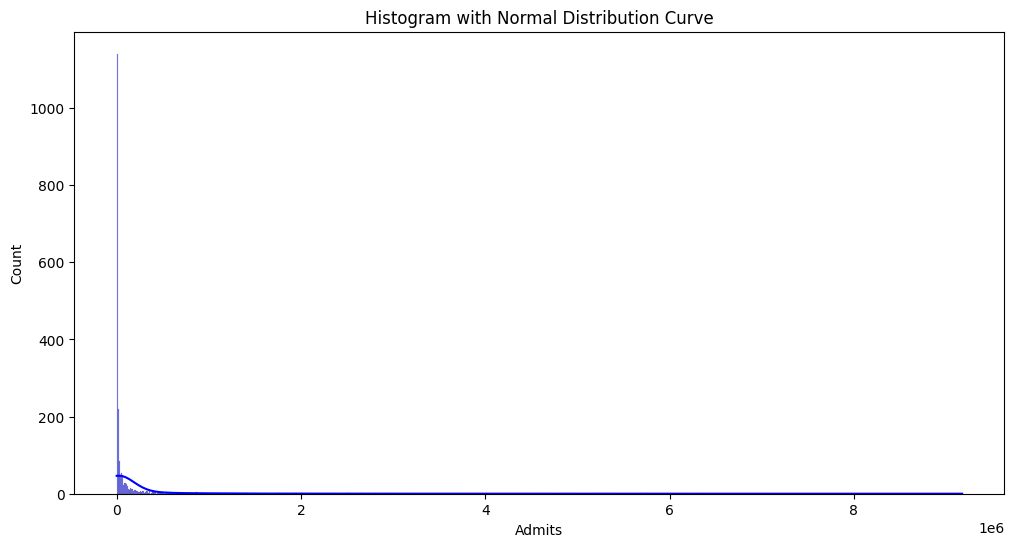

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Admits'], kde=True, color='blue')
plt.title('Histogram with Normal Distribution Curve')

In [47]:
column_name = 'Admits'
Q1 = df[column_name].quantile(0.10)
Q3 = df[column_name].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]


Text(0.5, 1.0, 'Histogram with Normal Distribution Curve')

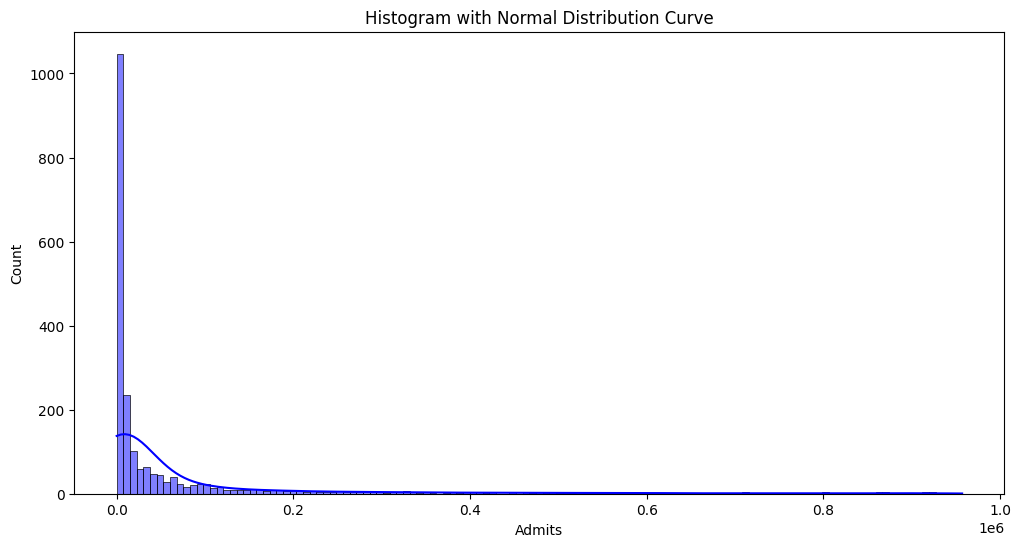

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Admits'], kde=True, color='blue')
plt.title('Histogram with Normal Distribution Curve')

In [49]:
df.head()

,Runtime,IMAX,Admits,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Language_English,Language_French,Language_Others_language,Type_Alt Prog Film Event,Type_Film Presentation,Type_Others_type,Year,Day,WeekDay,Weekend
0,97,0,1881,0,0,0,0,1,0,0,...,1,0,0,1,0,0,2017,11,0,0
2,118,0,560,0,0,0,0,0,0,0,...,1,0,0,1,0,0,2017,21,1,0
3,94,0,8700,0,1,0,0,0,0,0,...,1,0,0,1,0,0,2016,28,5,1
4,127,0,863944,1,1,0,0,0,0,0,...,1,0,0,0,1,0,2017,12,4,0
5,104,0,204068,0,0,0,1,1,0,0,...,1,0,0,0,1,0,2016,5,4,0


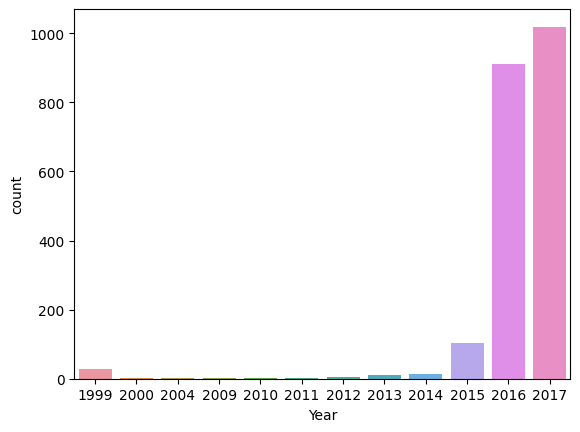

In [50]:
sns.countplot(x='Year', data=df)
plt.show()

In [51]:
df = df[df['Year'] >=2015]  # removing year less than 2015

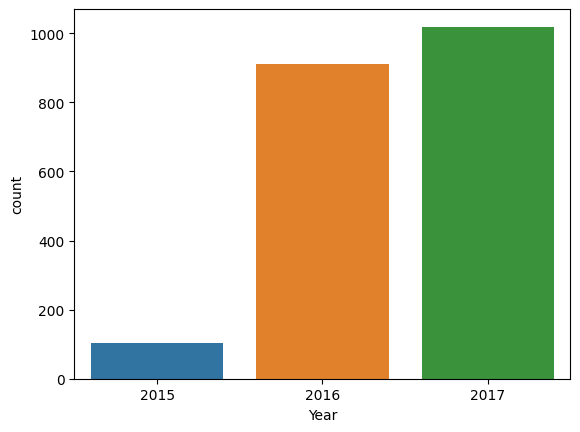

In [52]:
sns.countplot(x='Year', data=df)
plt.show()

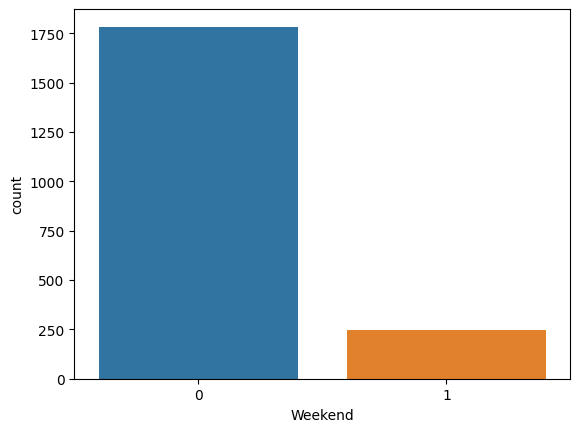

In [53]:
sns.countplot(x='Weekend', data=df)  # checking the distribution for weekend
plt.show()

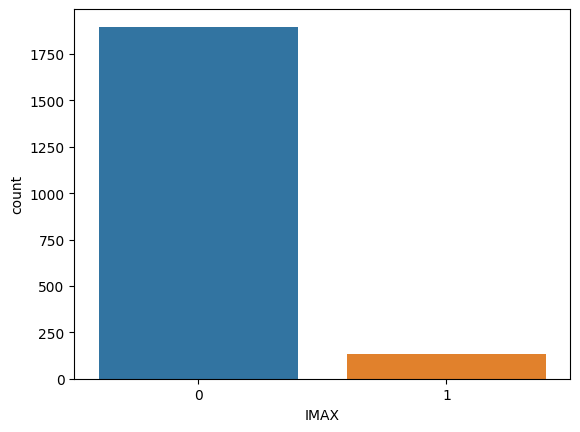

In [54]:
sns.countplot(x='IMAX', data=df) # checking the distribution of IMAX
plt.show()

In [55]:
# CHECK THE CORRELATION AMONG THE VARIABLES
correlation_matrix = df.corr()

correlation_matrix

,Runtime,IMAX,Admits,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Language_English,Language_French,Language_Others_language,Type_Alt Prog Film Event,Type_Film Presentation,Type_Others_type,Year,Day,WeekDay,Weekend
Runtime,1.000000,0.025426,0.035998,0.156968,-0.034543,-0.249755,0.037069,-0.173395,0.025127,-0.226733,...,-0.048616,-0.133739,0.213863,-0.159926,0.053848,0.129997,0.029030,0.006447,-0.010362,-0.081847
IMAX,0.025426,1.000000,0.050620,0.254014,0.222937,-0.044579,-0.056564,-0.093550,-0.016666,0.020465,...,0.032090,0.073305,-0.123996,-0.135705,0.178841,-0.090973,-0.028579,-0.030599,0.006485,-0.098894
Admits,0.035998,0.050620,1.000000,0.171311,0.105124,-0.010500,0.022878,-0.001383,0.064553,-0.121578,...,0.171199,-0.082080,-0.118905,-0.216265,0.282471,-0.141143,-0.025834,0.035797,0.005207,-0.146002
Action,0.156968,0.254014,0.171311,1.000000,0.312583,0.002122,-0.114568,-0.091801,0.173135,-0.172189,...,-0.114761,0.060351,0.073595,-0.005912,0.120584,-0.174473,-0.016997,0.052368,0.056551,-0.024180
Adventure,-0.034543,0.222937,0.105124,0.312583,1.000000,0.474591,-0.150992,0.154843,-0.072642,-0.152325,...,-0.027105,0.171579,-0.163034,0.231421,-0.081071,-0.183350,-0.034925,-0.026932,0.144802,0.279052
Animation,-0.249755,-0.044579,-0.010500,0.002122,0.474591,1.000000,-0.112852,0.298337,-0.023401,-0.107397,...,0.004236,0.094541,-0.113688,0.333028,-0.234014,-0.086455,0.012153,0.016094,0.100387,0.376982
Biography,0.037069,-0.056564,0.022878,-0.114568,-0.150992,-0.112852,1.000000,-0.145455,0.001708,0.059514,...,0.065044,-0.020672,-0.057232,-0.106713,0.080018,0.020096,-0.021833,-0.002647,-0.053302,-0.102087
Comedy,-0.173395,-0.093550,-0.001383,-0.091801,0.154843,0.298337,-0.145455,1.000000,-0.039955,-0.167623,...,-0.046602,0.052587,-0.002315,0.159806,-0.069504,-0.106171,0.000815,-0.014917,0.080927,0.174144
Crime,0.025127,-0.016666,0.064553,0.173135,-0.072642,-0.023401,0.001708,-0.039955,1.000000,-0.109762,...,-0.046134,0.014051,0.041294,-0.065076,0.116262,-0.089733,-0.019349,0.060758,-0.036258,-0.084045
Documentary,-0.226733,0.020465,-0.121578,-0.172189,-0.152325,-0.107397,0.059514,-0.167623,-0.109762,1.000000,...,0.138612,-0.052906,-0.111812,-0.101008,-0.220642,0.467065,-0.009982,0.004560,-0.231963,-0.057558


In [56]:
df.head()

,Runtime,IMAX,Admits,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Language_English,Language_French,Language_Others_language,Type_Alt Prog Film Event,Type_Film Presentation,Type_Others_type,Year,Day,WeekDay,Weekend
0,97,0,1881,0,0,0,0,1,0,0,...,1,0,0,1,0,0,2017,11,0,0
2,118,0,560,0,0,0,0,0,0,0,...,1,0,0,1,0,0,2017,21,1,0
3,94,0,8700,0,1,0,0,0,0,0,...,1,0,0,1,0,0,2016,28,5,1
4,127,0,863944,1,1,0,0,0,0,0,...,1,0,0,0,1,0,2017,12,4,0
5,104,0,204068,0,0,0,1,1,0,0,...,1,0,0,0,1,0,2016,5,4,0


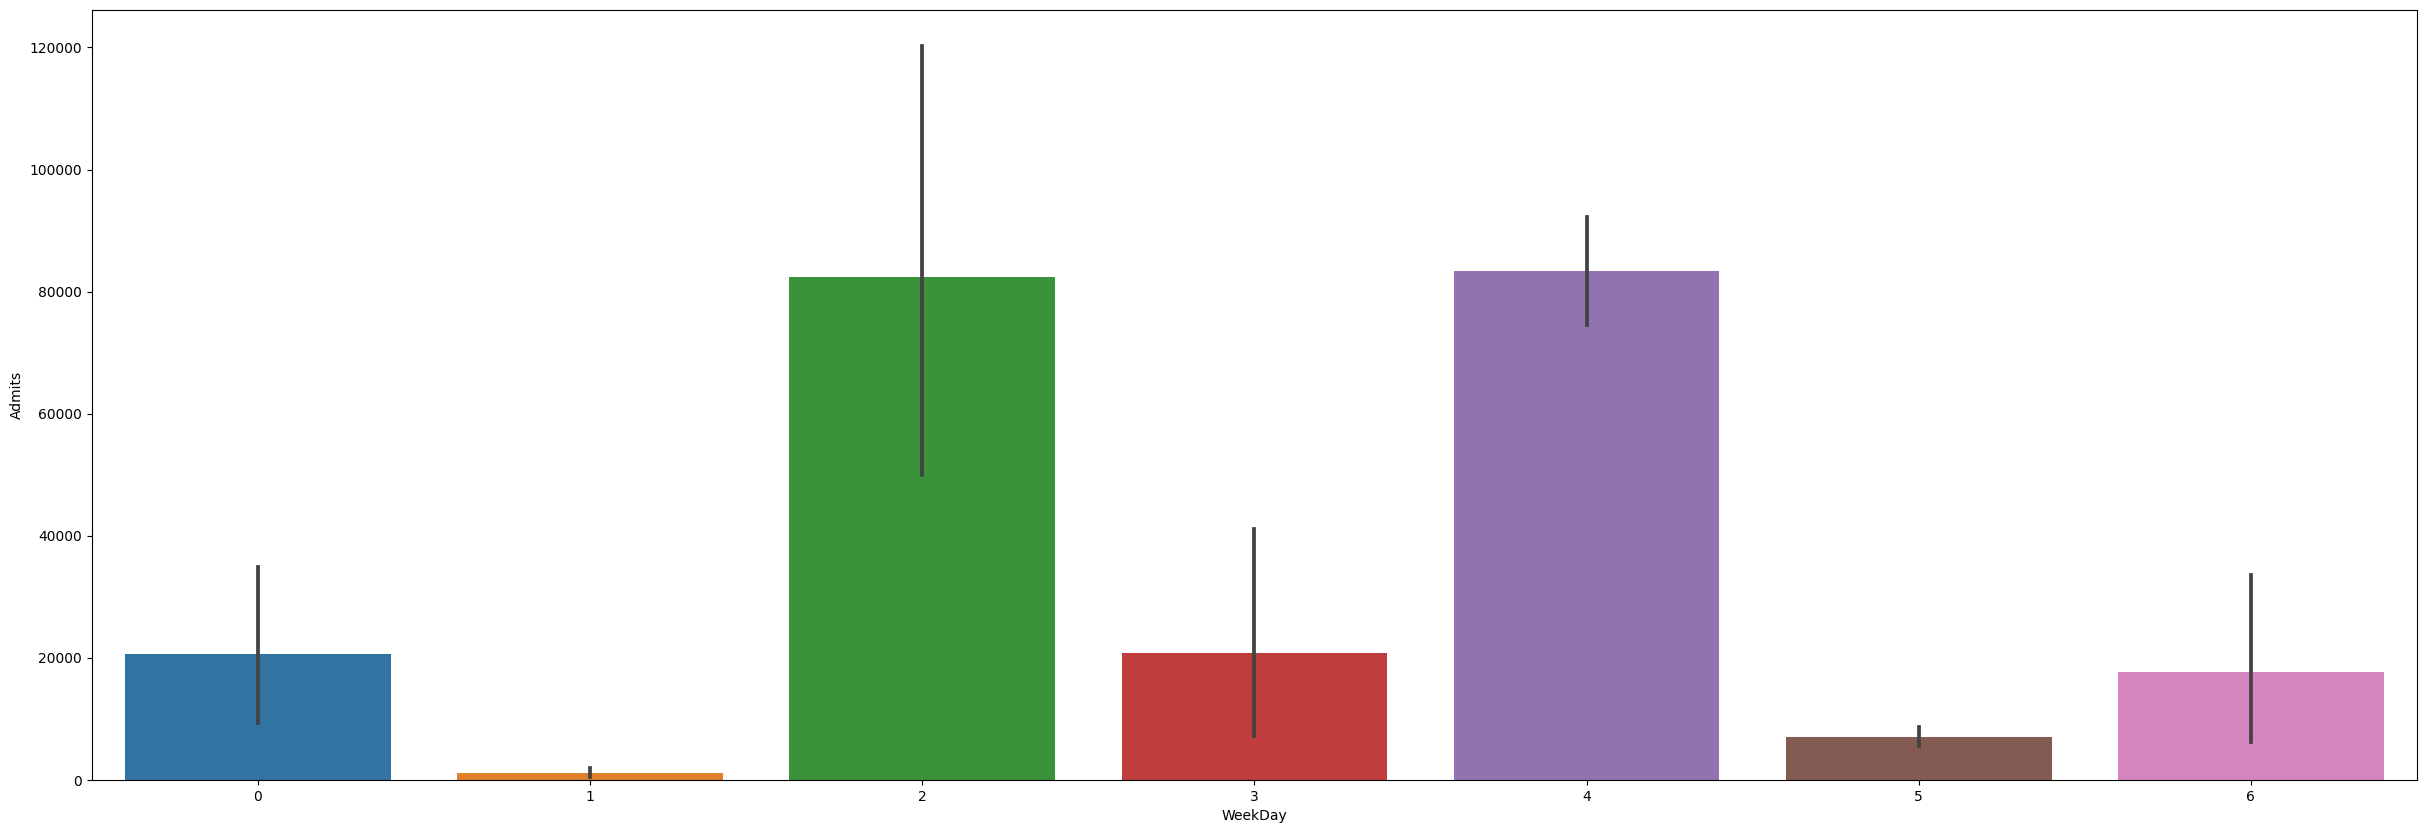

In [57]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='WeekDay', y='Admits', data=df)

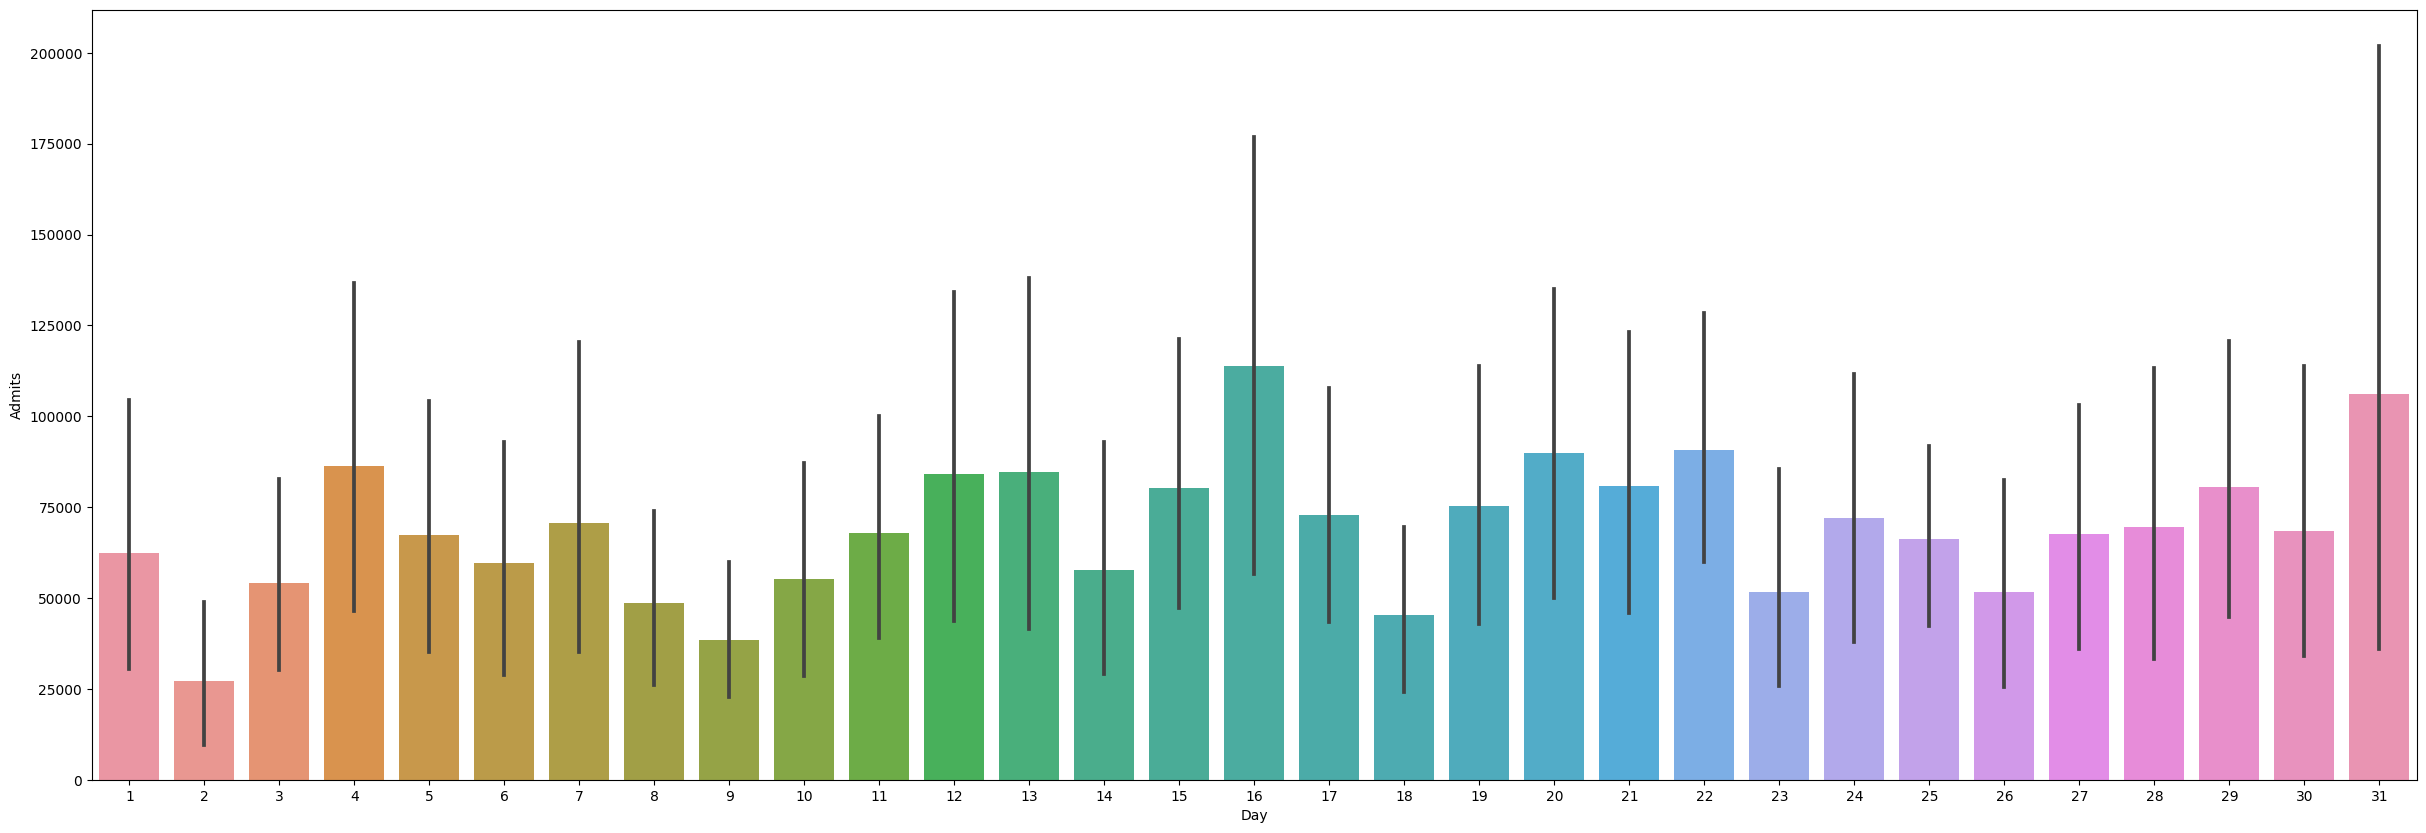

In [58]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Day', y='Admits', data=df)

<Axes: xlabel='WeekDay'>

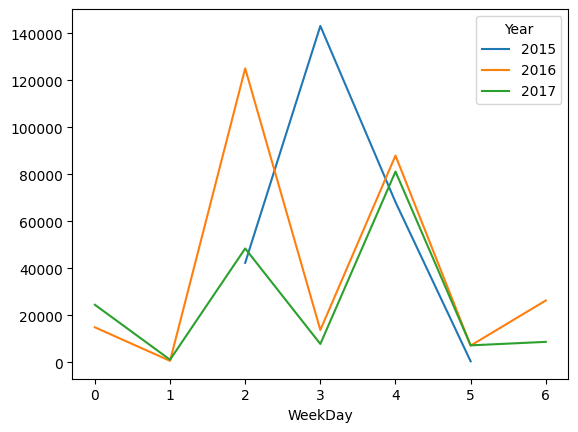

In [59]:
weekly_sales = pd.pivot_table(df, values = "Admits", columns = "Year", index = "WeekDay")
weekly_sales.plot()

<Axes: xlabel='Runtime'>

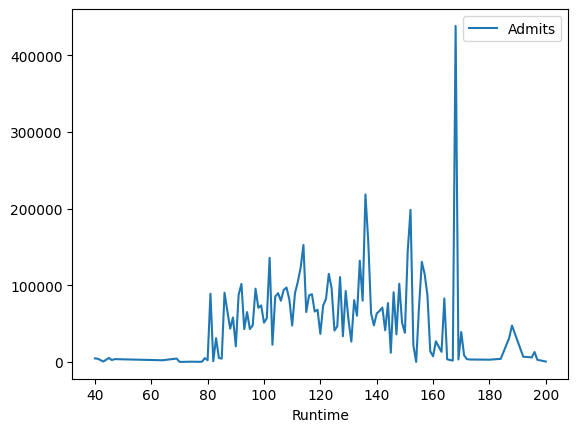

In [60]:
runtime_trend = pd.pivot_table(df, values = "Admits", index= "Runtime")
runtime_trend.plot()

In [61]:
# creating Train and Test split
train_data = df[:int(0.7*(len(df)))] # taking train part
test_data = df[int(0.7*(len(df))):] # taking test part

In [62]:
target = "Admits"
used_cols = [c for c in df.columns.to_list() if c not in [target]] # all columns except Admits

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [63]:
X = df[used_cols]

In [64]:
#first trial using random forest regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

                          Importance
Runtime                     0.114454
IMAX                        0.036291
Action                      0.064211
Adventure                   0.026898
Animation                   0.010455
Biography                   0.007208
Comedy                      0.014900
Crime                       0.011777
Documentary                 0.012178
Drama                       0.022777
Family                      0.024585
Fantasy                     0.017510
Game-Show                   0.000000
History                     0.006319
Horror                      0.009987
Music                       0.002582
Musical                     0.007480
Mystery                     0.024818
News                        0.000242
Reality-TV                  0.000591
Romance                     0.011922
Sci-Fi                      0.019539
Short                       0.000222
Sport                       0.004223
Talk-Show                   0.000055
Thriller                    0.016138
W

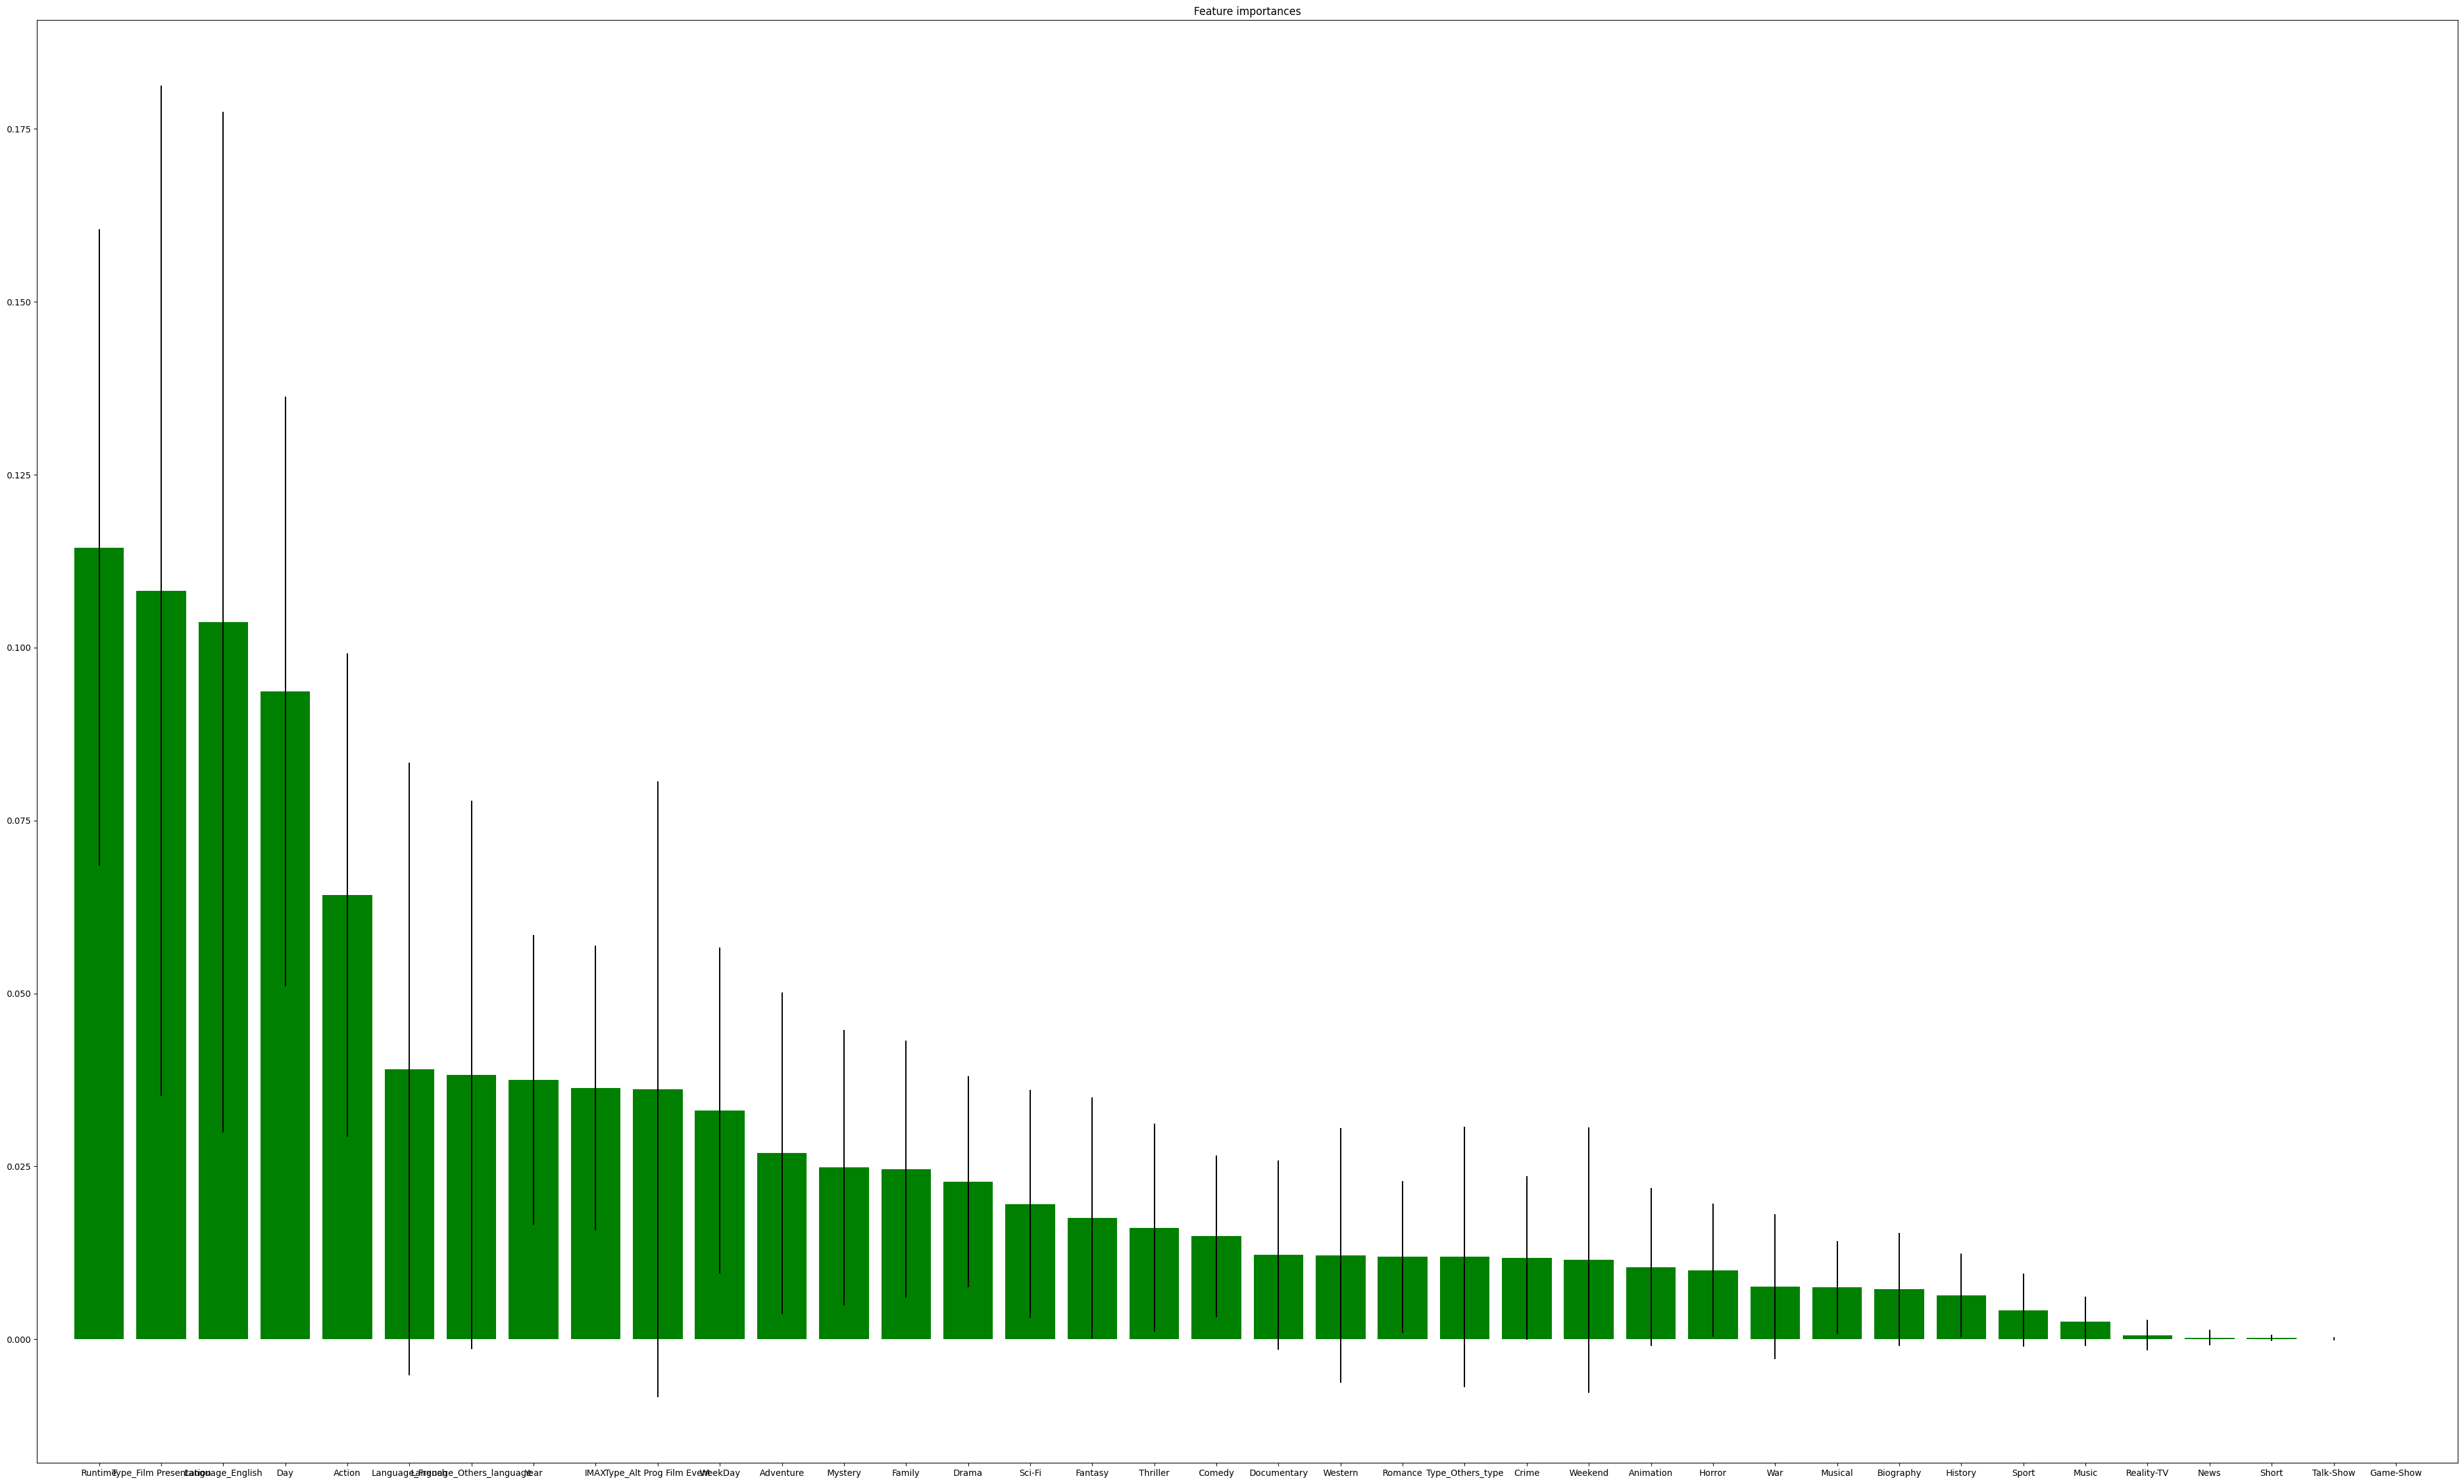

In [65]:
importances = rf.feature_importances_
feature_importances_2 = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['Importance'])
print(feature_importances_2)
print(len(feature_importances_2))
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure(figsize=(50,30))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [66]:
print("RMSE of train is : {}".format(np.sqrt(mean_squared_error(y_train,y_pred))))
print("RMSE of Test is : {}".format(np.sqrt(mean_squared_error(y_test,y_pred_test))))

RMSE of train is : 107650.93623272561
RMSE of Test is : 100667.74971708425


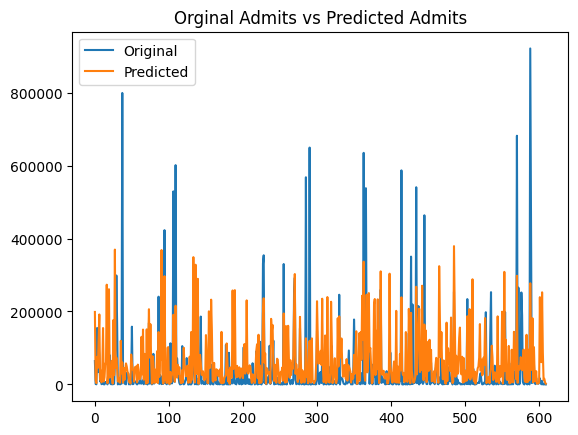

In [67]:
x_ax=range(len(y_test))
plt.plot(x_ax,y_test,label="Original")
plt.plot(x_ax,y_pred_test,label="Predicted")
plt.title("Orginal Admits vs Predicted Admits")
plt.legend()
plt.show()

In [68]:
# Now removing feature with importance less than 0.01
columns_to_drop = ['Game-Show',
'Music',
'News',
'Reality-TV',
'Short',
'Talk-Show',
'War',
'Western']
df1=df.drop(columns_to_drop, axis=1)

In [69]:
target = "Admits"
used_cols = [c for c in df1.columns.to_list() if c not in [target]] # all columns except Admits

X_train_new = train_data[used_cols]
X_test_new = test_data[used_cols]
y_train_new = train_data[target]
y_test_new = test_data[target]

In [70]:
X_new = df1[used_cols]

In [71]:
X_train_new.columns

Index(['Runtime', 'IMAX', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'Language_English', 'Language_French',
       'Language_Others_language', 'Type_Alt Prog Film Event',
       'Type_Film Presentation', 'Type_Others_type', 'Year', 'Day', 'WeekDay',
       'Weekend'],
      dtype='object')

In [72]:
#first trial using random forest regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_new, y_train_new)

# predictions on train set
y_pred_new = pipe.predict(X_train_new)

# predictions on test set
y_pred_test_new = pipe.predict(X_test_new)

In [73]:
print("RMSE of train is : {}".format(np.sqrt(mean_squared_error(y_train_new,y_pred_new))))
print("RMSE of Test is : {}".format(np.sqrt(mean_squared_error(y_test_new,y_pred_test_new))))

RMSE of train is : 106708.80531128496
RMSE of Test is : 102987.51356805446


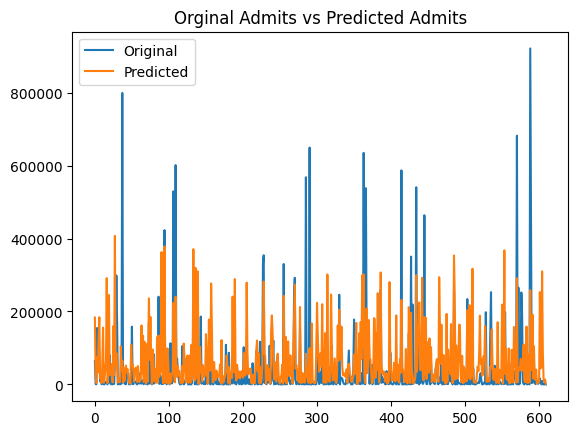

In [74]:
x_ax=range(len(y_test_new))
plt.plot(x_ax,y_test_new,label="Original")
plt.plot(x_ax,y_pred_test_new,label="Predicted")
plt.title("Orginal Admits vs Predicted Admits")
plt.legend()
plt.show()

In [75]:
#xgboost
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
xgb_reg = xgb.XGBRegressor()
xgb_grid = GridSearchCV(xgb_reg, xgb_params, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
xgb_preds = xgb_best.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_rmse= np.sqrt(mean_squared_error(y_test,xgb_preds))
print("XGBoost - MSE: {:.2f}, R-squared: {:.2f},RMSE: {:.2f}".format(xgb_mse, xgb_r2,xgb_rmse))



XGBoost - MSE: 10895708806.42, R-squared: -0.02,RMSE: 104382.51


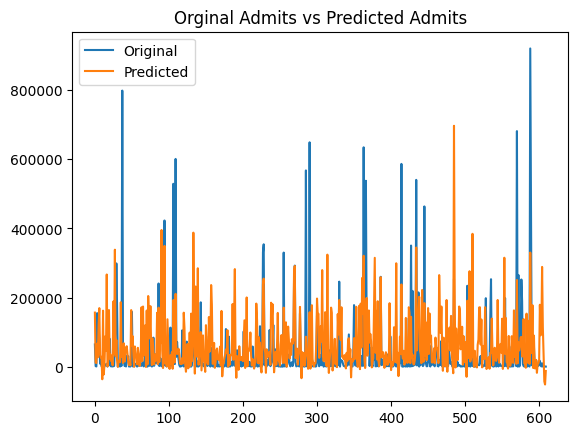

In [76]:
x_ax=range(len(y_test))
plt.plot(x_ax,y_test,label="Original")
plt.plot(x_ax,xgb_preds,label="Predicted")
plt.title("Orginal Admits vs Predicted Admits")
plt.legend()
plt.show()